In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import classification_report

In [42]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [43]:
len(df)

1470

The following process divides the dataset into the attrition column and feature columns and then divides them into atraining and testing sets so a machine learning modele can be trained and tested.

In [44]:
df.drop('Attrition', axis = 1).select_dtypes('object')

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,Sales Executive,Very High,Single,Y,Yes,Excellent,Low,Bad
1,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,Research Scientist,Medium,Married,Y,No,Outstanding,Very High,Better
2,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,Laboratory Technician,High,Single,Y,Yes,Excellent,Medium,Better
3,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,Research Scientist,High,Married,Y,Yes,Excellent,High,Better
4,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,Laboratory Technician,Medium,Married,Y,No,Excellent,Very High,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,College,Medical,High,Male,Very High,Laboratory Technician,Very High,Married,Y,No,Excellent,High,Better
1466,Travel_Rarely,Research & Development,Below College,Medical,Very High,Male,Medium,Healthcare Representative,Low,Married,Y,No,Excellent,Low,Better
1467,Travel_Rarely,Research & Development,Bacheolor,Life Sciences,Medium,Male,Very High,Manufacturing Director,Medium,Married,Y,Yes,Outstanding,Medium,Better
1468,Travel_Frequently,Sales,Bacheolor,Medical,Very High,Male,Medium,Sales Executive,Medium,Married,Y,No,Excellent,Very High,Good


In [45]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [46]:
X = pd.get_dummies(df.drop('Attrition', axis = 1))
y = pd.get_dummies(df['Attrition'], drop_first = True)

In [47]:
y

,Yes
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 4)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
model1 = LogisticRegression()
model1.fit(X_train, y_train)

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Allen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [50]:
train_predict1 = model1.predict(X_train)
mean_squared_error(train_predict1, y_train)
y_pred1 = model1.predict(X_test)
print('F1 :', f1_score(y_test, y_pred1), 'Precision Score:', precision_score(y_test, y_pred1),'Recall Score :', recall_score(y_test, y_pred1))

F1 : 0.0 Precision Score: 0.0 Recall Score : 0.0


In [51]:
confusion_matrix(y_test,y_pred1)

array([[307,   1],
       [ 60,   0]], dtype=int64)

In [161]:
classification_report(y_test,y_pred1)

'              precision    recall  f1-score   support\n\n           0       0.84      1.00      0.91       308\n           1       0.00      0.00      0.00        60\n\n    accuracy                           0.83       368\n   macro avg       0.42      0.50      0.45       368\nweighted avg       0.70      0.83      0.76       368\n'

In [52]:
precision_score(y_test, y_pred1)

0.0

In [53]:
y_test

,Yes
325,0
1165,0
1153,1
1403,0
1019,0
...,...
526,0
644,0
652,0
527,0


In [54]:
pd.DataFrame(model1.predict(X_test)).value_counts()

0    367
1      1
dtype: int64

In [55]:
y_test.value_counts()

Yes
0      308
1       60
dtype: int64

In [56]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
train_predict2 = model2.predict(X_train)
mean_squared_error(train_predict2, y_train)
mean_squared_error(model2.predict(X_test), y_test)

C:\Users\Allen\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.13858695652173914

In [57]:
y_pred2 = model2.predict(X_test)
print('F1 :', f1_score(y_test, y_pred2), 'Precision Score:', precision_score(y_test, y_pred2),'Recall Score :', recall_score(y_test, y_pred2))

F1 : 0.3013698630136986 Precision Score: 0.8461538461538461 Recall Score : 0.18333333333333332


In [165]:
confusion_matrix(y_test,y_pred2)

array([[306,   2],
       [ 49,  11]], dtype=int64)

In [166]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       308
           1       0.85      0.18      0.30        60

    accuracy                           0.86       368
   macro avg       0.85      0.59      0.61       368
weighted avg       0.86      0.86      0.82       368



# Model 2: 
## F1 Score: 0.30 Precision Score: 0.84 Recall Score : 0.18

In [59]:
# sklearn.utils.class

The previous models had high rates of accuracy but were overall not useful because they failed to identify most if not all cases of attrition. This is likely becvause the data is imbalanced and there are far less cases of employee attrition in comparison to employees that didn't quit. The following models will handle this imbalance by increasing the weight of the attrition class. 

In [60]:
model3 = RandomForestClassifier(class_weight = 'balanced')
model3.fit(X_train, y_train)
train_predict3 = model3.predict(X_train)
y_pred3 = model3.predict(X_test)

C:\Users\Allen\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [61]:
print('F1 :', f1_score(y_test, y_pred3), 'Precision Score:', precision_score(y_test, y_pred3),'Recall Score :', recall_score(y_test, y_pred3))

F1 : 0.18181818181818182 Precision Score: 1.0 Recall Score : 0.1


In [62]:
confusion_matrix(y_test, y_pred3)

array([[308,   0],
       [ 54,   6]], dtype=int64)

# Model 3: 
## F1 Score: 0.18 Precision Score: 1.0 Recall Score : 0.1

## Weighting the variables has appeared to make the model worse with the precision and recall values indicating more false positives and false negatives. 

### Value counts for test data:

In [63]:
pd.DataFrame(model3.predict(X_test)).value_counts()

0    362
1      6
dtype: int64

In [64]:
y_test.value_counts()

Yes
0      308
1       60
dtype: int64

This model predicted 8 more cases of attrition than the previous model

### Value counts for training data

In [65]:
pd.DataFrame(model3.predict(X_train)).value_counts()

0    925
1    177
dtype: int64

In [66]:
y_train.values

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=uint8)

**The data fits perfectly for the training data which might indicate over fitting. 

Does perfectly fit training data indicate over fititing?**

# Hyper Parameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {'bootstrap': [True],
 'max_depth': [5, 10, 20, 30, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 200, 400]}

clf = GridSearchCV(model3, param_grid, cv = 5)


In [69]:
clf = GridSearchCV(model3, param_grid, cv = 5)
clf.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'bootstrap': [True],
                         'max_depth': [5, 10, 20, 30, None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 400]})

In [70]:
clf.cv_results_

{'mean_fit_time': array([0.06686058, 0.12971807, 0.25814466, 0.51540403, 0.06528754,
        0.13024797, 0.25465579, 0.5078546 , 0.06911688, 0.12831635,
        0.26578746, 0.50982652, 0.06399474, 0.1322279 , 0.25578938,
        0.51018796, 0.06625996, 0.12891731, 0.25553885, 0.51071849,
        0.06501369, 0.12951746, 0.2563767 , 0.50823531, 0.0658596 ,
        0.12820611, 0.25610533, 0.5059814 , 0.0683713 , 0.12831678,
        0.25382843, 0.50961657, 0.06525946, 0.12679043, 0.25523124,
        0.50912371, 0.07767067, 0.15313873, 0.30561604, 0.60653596,
        0.07767015, 0.15093703, 0.3021874 , 0.59807711, 0.07446728,
        0.14793463, 0.29160476, 0.58307734, 0.07835841, 0.15093737,
        0.29940157, 0.59752202, 0.07703519, 0.14993629, 0.29668112,
        0.59624343, 0.07713976, 0.14693112, 0.29162245, 0.58166366,
        0.0713491 , 0.14876366, 0.28925247, 0.57612319, 0.07406702,
        0.1461329 , 0.28966327, 0.57612357, 0.07366681, 0.14433117,
        0.28646078, 0.57251978,

In [71]:
clf.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [156]:
model4 = RandomForestClassifier(class_weight = 'balanced', bootstrap = True,
 max_depth = 20,
 max_features = 'auto',
 min_samples_leaf =  4,
 min_samples_split =  10,
 n_estimators = 100)
model4.fit(X_train, y_train.values.ravel())
train_predict4 = model4.predict(X_train)
y_pred4 = model4.predict(X_test)

In [157]:
print('F1 :', f1_score(y_test, y_pred4), 'Precision Score:', precision_score(y_test, y_pred4),'Recall Score :', recall_score(y_test, y_pred4))

F1 : 0.40860215053763443 Precision Score: 0.5757575757575758 Recall Score : 0.31666666666666665


In [71]:
confusion_matrix(y_test,y_pred4)

array([[299,   9],
       [ 43,  17]], dtype=int64)

# Model 4: 
## F1 Score: 0.395 Precision Score: 0.65 Recall Score : 0.28

In [72]:
random_params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
clf1 = RandomizedSearchCV(model3, random_params ,n_iter = 20, cv = 5)
clf1.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [76]:
clf1.cv_results_

{'mean_fit_time': array([3.28808808, 2.93609643, 2.79417834, 0.66812329, 0.58550668,
        0.66265397, 1.53410835, 1.30109448, 0.88264751, 2.60392938,
        0.61470289, 0.30930667, 1.55013404, 2.6987494 , 1.98402305,
        1.74339261, 2.67156796, 1.22775002, 1.65836258, 2.5844265 ]),
 'std_fit_time': array([0.03523637, 0.02628577, 0.02082768, 0.00613453, 0.00185785,
        0.00769298, 0.01468286, 0.01000552, 0.00636804, 0.0136763 ,
        0.0053111 , 0.00325731, 0.01539371, 0.02262528, 0.00599318,
        0.01310315, 0.02286543, 0.00888644, 0.00926982, 0.02596647]),
 'mean_score_time': array([0.15054913, 0.13607416, 0.13439636, 0.0315629 , 0.03116765,
        0.03156333, 0.0819499 , 0.0611794 , 0.04726562, 0.12088742,
        0.03119502, 0.01667824, 0.07540956, 0.13669462, 0.0920485 ,
        0.08102188, 0.14201136, 0.06131721, 0.07656717, 0.12984405]),
 'std_score_time': array([2.42674679e-03, 1.35780097e-03, 1.96810201e-03, 7.46586051e-04,
        3.91574151e-04, 4.05712081e-

In [107]:
clf1.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 1,
 'bootstrap': True}

In [154]:
model5 = RandomForestClassifier(class_weight = 'balanced', bootstrap = True,
 max_depth = None,
 max_features = 'auto',
 min_samples_leaf =  1,
 min_samples_split =  5,
 n_estimators = 1800)
model5.fit(X_train, y_train.values.ravel())
train_predict5 = model3.predict(X_train)
y_pred5 = model5.predict(X_test)

In [155]:
print('F1 :', f1_score(y_test, y_pred5), 'Precision Score:', precision_score(y_test, y_pred5),'Recall Score :', recall_score(y_test, y_pred5))

F1 : 0.29729729729729726 Precision Score: 0.7857142857142857 Recall Score : 0.18333333333333332


# Model 5: 
## F1 Score: 0.297 Precision Score: 0.79 Recall Score : 0.18

A max depth of None likely leads to over fitting so I'm going to try several different values for max depth
Number of estimators might also be too large.

In [85]:
clf2 = GridSearchCV(model5, {'max_depth': [1,2,3,5,7,10,15]}, cv = 5)
clf2.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              min_samples_split=5,
                                              n_estimators=1800),
             param_grid={'max_depth': [1, 2, 3, 5, 7, 10, 15]})

In [86]:
clf2.cv_results_

{'mean_fit_time': array([1.82207842, 1.9446723 , 2.08197598, 2.3414938 , 2.55423636,
        2.73519673, 2.77310052]),
 'std_fit_time': array([0.01375992, 0.00554061, 0.01352964, 0.02091178, 0.01852968,
        0.03205643, 0.01390334]),
 'mean_score_time': array([0.10860424, 0.11977162, 0.11464376, 0.12069564, 0.12688408,
        0.14051213, 0.13321414]),
 'std_score_time': array([0.00125694, 0.01318351, 0.0009399 , 0.00091609, 0.00120859,
        0.01173743, 0.00076624]),
 'param_max_depth': masked_array(data=[1, 2, 3, 5, 7, 10, 15],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 5},
  {'max_depth': 7},
  {'max_depth': 10},
  {'max_depth': 15}],
 'split0_test_score': array([0.74660633, 0.77375566, 0.78733032, 0.83710407, 0.86425339,
        0.85972851, 0.85972851]),
 'split1_test_score': array([0.78733032, 0.79638009, 0.832579

In [128]:
def hyper_parameter_visual(model,general_parameters,adjusted_param, adjusted_param_vals, X_train, X_test, y_train, y_test):
    
    train_values = []
    test_values = []
    
    for val in adjusted_param_vals:
        general_parameters[adjusted_param] = val
        model.set_params(** general_parameters)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        train_values.append(roc_auc)
        
        
        y_pred = model.predict(X_test)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_values.append(roc_auc)
        
    
    plt.plot(adjusted_param_vals, train_values, c = 'b')
    plt.plot(adjusted_param_vals, test_values, c = 'r')
    plt.ylabel('score')
    plt.xlabel('parameter value')

In [91]:
test_values = [range(10)]
print(test_values)

[range(0, 10)]


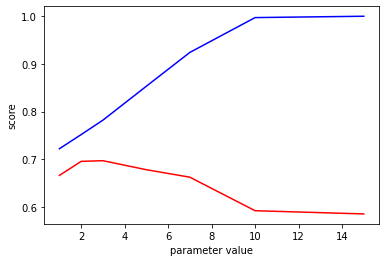

In [129]:
hyper_parameter_visual(model3, clf1.best_params_, 'max_depth', [1, 2, 3, 5, 7, 10, 15], X_train, X_test, y_train.values.ravel(), y_test.values.ravel())

Indicates a max depth of two or three is most informative.

In [130]:
random_params1 = {'bootstrap': [True, False],
 'max_depth': [2,3],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

In [133]:
clf3 = RandomizedSearchCV(model3, random_params1 ,n_iter = 20, cv = 5)

In [134]:
clf3.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    max_depth=15,
                                                    min_samples_split=5,
                                                    n_estimators=1800),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]})

In [137]:
clf3.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 3,
 'bootstrap': True}

In [145]:
random_params_test = {'bootstrap': True,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 30}

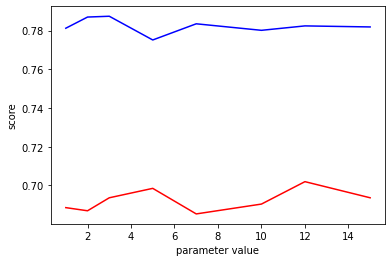

In [140]:
hyper_parameter_visual(model3, random_params2, 'min_samples_leaf', [1, 2, 3, 5, 7, 10,12, 15], X_train, X_test, y_train.values.ravel(), y_test.values.ravel())

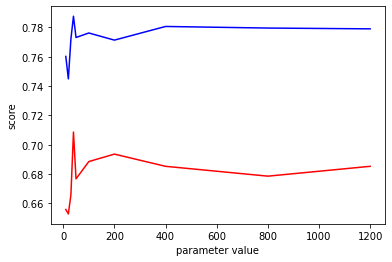

In [152]:
hyper_parameter_visual(model3, random_params_test, 'n_estimators', [10,20,30,40,50, 100, 200, 400, 800,1200], X_train, X_test, y_train.values.ravel(), y_test.values.ravel())

In [158]:
model6 = RandomForestClassifier(class_weight = 'balanced', bootstrap = True,
 max_depth = 3,
 max_features = 'auto',
 min_samples_leaf =  5,
 min_samples_split =  2,
 n_estimators = 30)
model6.fit(X_train, y_train.values.ravel())
train_predict6 = model6.predict(X_train)
y_pred6 = model6.predict(X_test)

In [159]:
print('F1 :', f1_score(y_test, y_pred5), 'Precision Score:', precision_score(y_test, y_pred5),'Recall Score :', recall_score(y_test, y_pred5))

F1 : 0.29729729729729726 Precision Score: 0.7857142857142857 Recall Score : 0.18333333333333332
